In [1]:
import pandas as pd
import seaborn as sns

In [2]:
FILE_PATH = 'limite_credito.xlsx'

df = pd.read_excel(FILE_PATH)
df.head(5)

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()

le.fit(df['Escolaridade'])
df['Escolaridade'] = le.transform(df['Escolaridade'])

le.fit(df['Gênero'])
df['Gênero'] = le.transform(df['Gênero'])

le.fit(df['Região'])
df['Região'] = le.transform(df['Região'])

df.head(5)

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,0,0,0,500
1,68,5000,5000,380,0,0,0,600
2,44,5800,5800,500,0,0,0,800
3,72,4300,4300,2000,0,0,0,1000
4,75,4400,4400,3000,0,0,0,1000


c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LimitedoChequeEspecial', ylabel='Count'>

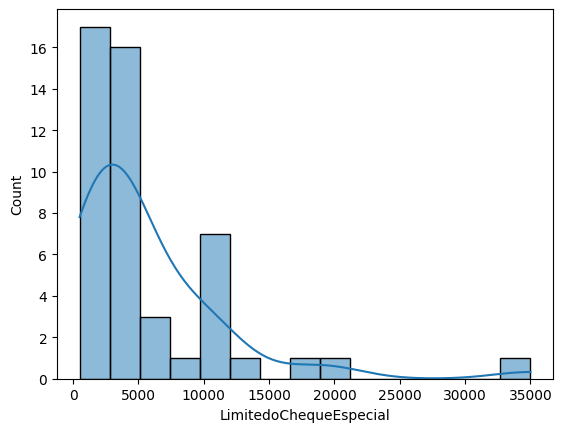

In [5]:
sns.histplot(df['LimitedoChequeEspecial'], kde=True)

c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Idade', ylabel='Count'>

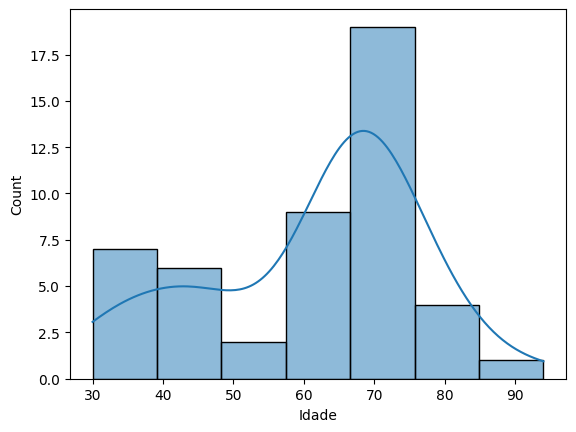

In [6]:
sns.histplot(df['Idade'], kde=True)

In [7]:
df.describe().round(2)

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00
mean,61.46,12275.08,10507.12,2175.21,0.38,0.46,0.50,5620.73
std,15.28,12640.65,9332.17,938.09,0.49,0.50,0.51,6131.90
min,30.00,4300.00,4027.00,340.00,0.00,0.00,0.00,500.00
25%,47.00,6380.00,5950.00,1925.00,0.00,0.00,0.00,2262.50
50%,66.50,8400.00,7400.00,2000.00,0.00,0.00,0.50,3550.00
75%,70.00,12378.25,10163.00,3000.00,1.00,1.00,1.00,6500.00
max,94.00,81000.00,54500.00,3500.00,1.00,1.00,1.00,35000.00


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler  = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [10]:
df_norm.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.491536,0.103978,0.128388,0.580762,0.375000,0.458333,0.500000,0.148427
std,0.238820,0.164806,0.184894,0.296865,0.489246,0.503534,0.505291,0.177736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265625,0.027119,0.038100,0.501582,0.000000,0.000000,0.000000,0.051087
50%,0.570312,0.053455,0.066828,0.525316,0.000000,0.000000,0.500000,0.088406
75%,0.625000,0.105323,0.121570,0.841772,1.000000,1.000000,1.000000,0.173913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
import statsmodels.formula.api as smf

func      = 'LimitedoChequeEspecial~Salario+Gênero+Região'
model_smf = smf.ols(formula=func, data=df_norm).fit()
print(model_smf.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Sun, 18 Feb 2024   Prob (F-statistic):           3.24e-20
Time:                            18:53:53   Log-Likelihood:                 66.039
No. Observations:                      48   AIC:                            -124.1
Df Residuals:                          44   BIC:                            -116.6
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [12]:
y = df_norm['LimitedoChequeEspecial']
X = df_norm[['Idade', 'RendimentoTotal', 'Salario', 'LimitedeCreditoImediato', 'Escolaridade', 'Gênero', 'Região']]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
import statsmodels.api as sm

In [16]:
X_train_const = sm.add_constant(X_train)

In [17]:
model_statsmodels = sm.OLS(y_train, X_train_const, hasconst=True).fit()
print(model_statsmodels.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.956
Model:                                OLS   Adj. R-squared:                  0.946
Method:                     Least Squares   F-statistic:                     93.20
Date:                    Sun, 18 Feb 2024   Prob (F-statistic):           1.38e-18
Time:                            18:53:54   Log-Likelihood:                 68.247
No. Observations:                      38   AIC:                            -120.5
Df Residuals:                          30   BIC:                            -107.4
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [18]:
y = df_norm['LimitedoChequeEspecial']
X = df_norm[['Salario', 'Gênero', 'Região']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_const = sm.add_constant(X_train)

In [19]:
model_statsmodels = sm.OLS(y_train, X_train_const, hasconst=True).fit()
print(model_statsmodels.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.939
Model:                                OLS   Adj. R-squared:                  0.933
Method:                     Least Squares   F-statistic:                     173.2
Date:                    Sun, 18 Feb 2024   Prob (F-statistic):           1.16e-20
Time:                            18:53:54   Log-Likelihood:                 61.896
No. Observations:                      38   AIC:                            -115.8
Df Residuals:                          34   BIC:                            -109.2
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f'R² -> {model.score(X_train, y_train).round(2)}')

R² -> 0.94


In [23]:
from sklearn import metrics
import numpy as np

y_pred = model.predict(X_test)
print(f'MAE  -> {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE  -> {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE -> {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

MAE  -> 0.06987270468300606
MSE  -> 0.010091741419997361
RMSE -> 0.10045765983735318
